In [39]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from lazypredict.Supervised import LazyRegressor
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, HistGradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import GridSearchCV
import pickle

# Data Preprocessing

In [17]:
# Read Jan 2017 Onwards file
df = pd.read_csv(r"D:\Guvi\Projects\Singapore Resale Flat Prices Predicting\Data\Resale flat prices based on registration date from Jan-2017 onwards.csv")
df

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
0,2017-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44.00,Improved,1979,61 years 04 months,232000.00
1,2017-01,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,01 TO 03,67.00,New Generation,1978,60 years 07 months,250000.00
2,2017-01,ANG MO KIO,3 ROOM,602,ANG MO KIO AVE 5,01 TO 03,67.00,New Generation,1980,62 years 05 months,262000.00
3,2017-01,ANG MO KIO,3 ROOM,465,ANG MO KIO AVE 10,04 TO 06,68.00,New Generation,1980,62 years 01 month,265000.00
4,2017-01,ANG MO KIO,3 ROOM,601,ANG MO KIO AVE 5,01 TO 03,67.00,New Generation,1980,62 years 05 months,265000.00
...,...,...,...,...,...,...,...,...,...,...,...
193742,2024-11,YISHUN,5 ROOM,235,YISHUN ST 21,07 TO 09,135.00,Model A,1985,59 years 10 months,686000.00
193743,2024-11,YISHUN,5 ROOM,335C,YISHUN ST 31,07 TO 09,112.00,Improved,2015,90 years 01 month,700000.00
193744,2024-11,YISHUN,5 ROOM,511B,YISHUN ST 51,10 TO 12,113.00,Improved,2017,91 years 10 months,720000.00
193745,2024-11,YISHUN,5 ROOM,602,YISHUN ST 61,01 TO 03,121.00,Improved,1987,61 years 08 months,620000.00


In [18]:
df.isna().sum()

month                  0
town                   0
flat_type              0
block                  0
street_name            0
storey_range           0
floor_area_sqm         0
flat_model             0
lease_commence_date    0
remaining_lease        0
resale_price           0
dtype: int64

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193747 entries, 0 to 193746
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   month                193747 non-null  object 
 1   town                 193747 non-null  object 
 2   flat_type            193747 non-null  object 
 3   block                193747 non-null  object 
 4   street_name          193747 non-null  object 
 5   storey_range         193747 non-null  object 
 6   floor_area_sqm       193747 non-null  float64
 7   flat_model           193747 non-null  object 
 8   lease_commence_date  193747 non-null  int64  
 9   remaining_lease      193747 non-null  object 
 10  resale_price         193747 non-null  float64
dtypes: float64(2), int64(1), object(8)
memory usage: 16.3+ MB


In [20]:
# Converting Data Types
df['month'] = pd.to_datetime(df['month'])

# Spliting the month column to 'year' and 'month'
df['year']= df['month'].dt.year
df['month']= df['month'].dt.month

In [21]:
# Convert 'remaining_lease' to 'months'
def parse_remaining_lease(lease):
    years, months = 0, 0
    parts = lease.split()
    if "years" in parts:
        years = int(parts[0])
    if "months" in parts:
        months = int(parts[-2])
    return years * 12 + months

df['remaining_lease_months'] = df['remaining_lease'].apply(parse_remaining_lease)

# Drop remaining_lease column
df.drop(columns=['remaining_lease'], inplace=True)

In [22]:
# Encoding Categorical Variables
cols=['town','flat_type','storey_range','flat_model']
model = LabelEncoder()
for col in cols:
    df[col]=model.fit_transform(df[col])

# dropping the irrelvent columns
df.drop(columns=['block','street_name'],inplace = True)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193747 entries, 0 to 193746
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   month                   193747 non-null  int32  
 1   town                    193747 non-null  int64  
 2   flat_type               193747 non-null  int64  
 3   storey_range            193747 non-null  int64  
 4   floor_area_sqm          193747 non-null  float64
 5   flat_model              193747 non-null  int64  
 6   lease_commence_date     193747 non-null  int64  
 7   resale_price            193747 non-null  float64
 8   year                    193747 non-null  int32  
 9   remaining_lease_months  193747 non-null  int64  
dtypes: float64(2), int32(2), int64(6)
memory usage: 13.3 MB


In [26]:
df.isna().sum()

month                     0
town                      0
flat_type                 0
storey_range              0
floor_area_sqm            0
flat_model                0
lease_commence_date       0
resale_price              0
year                      0
remaining_lease_months    0
dtype: int64

# EDA

In [27]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
month,193747.00,6.58,3.36,1.00,4.00,7.00,9.00,12.00
town,193747.00,13.99,7.93,0.00,8.00,15.00,21.00,25.00
flat_type,193747.00,3.12,0.92,0.00,2.00,3.00,4.00,6.00
storey_range,193747.00,2.25,1.98,0.00,1.00,2.00,3.00,16.00
floor_area_sqm,193747.00,97.03,24.04,31.00,82.00,93.00,112.00,366.70
flat_model,193747.00,8.64,3.61,0.00,5.00,8.00,12.00,20.00
lease_commence_date,193747.00,1996.15,14.13,1966.00,1985.00,1996.00,2011.00,2021.00
resale_price,193747.00,505936.24,176674.34,140000.00,375000.00,475000.00,605000.00,1588000.00
year,193747.00,2020.68,2.23,2017.00,2019.00,2021.00,2023.00,2024.00
remaining_lease_months,193747.00,893.99,168.52,495.00,756.00,893.00,1062.00,1173.00


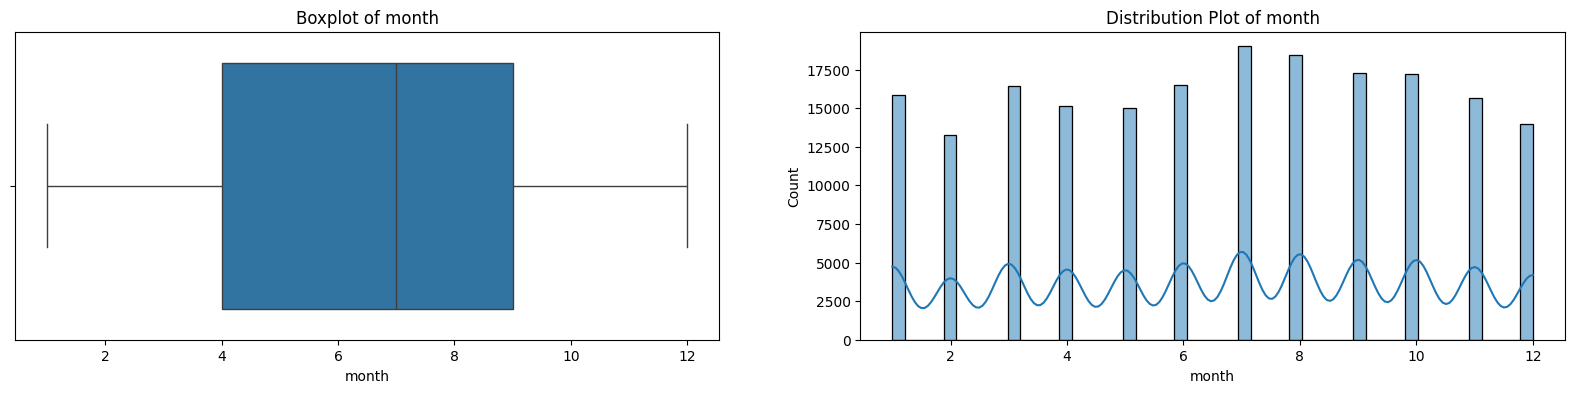

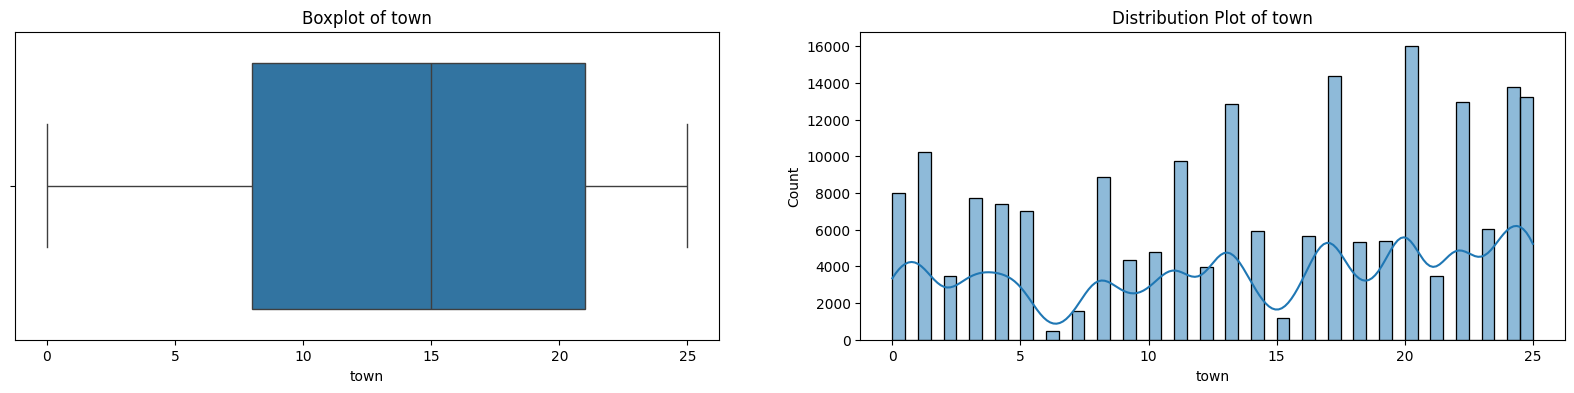

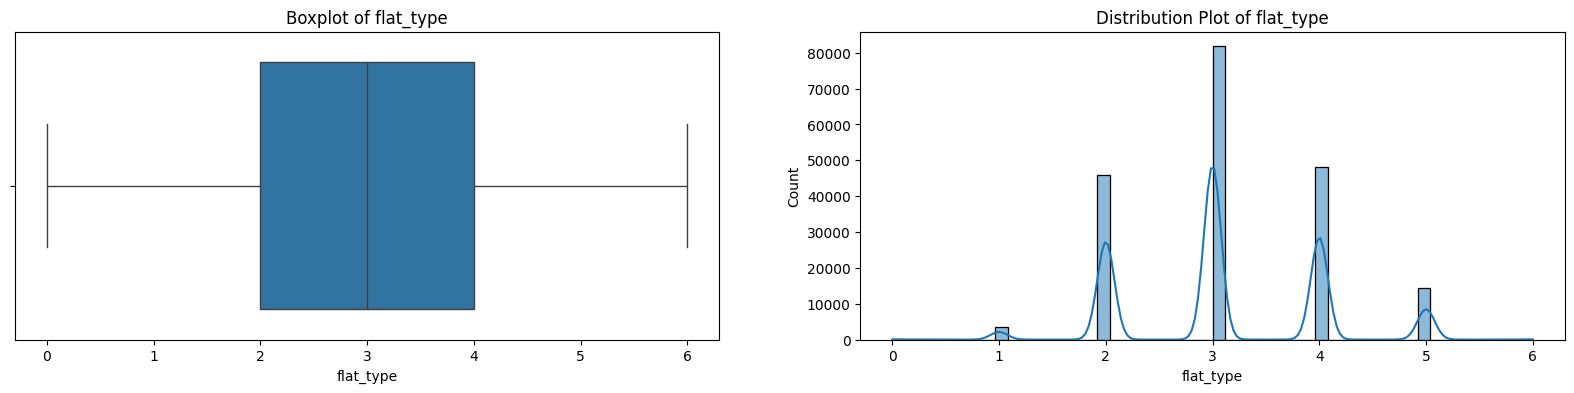

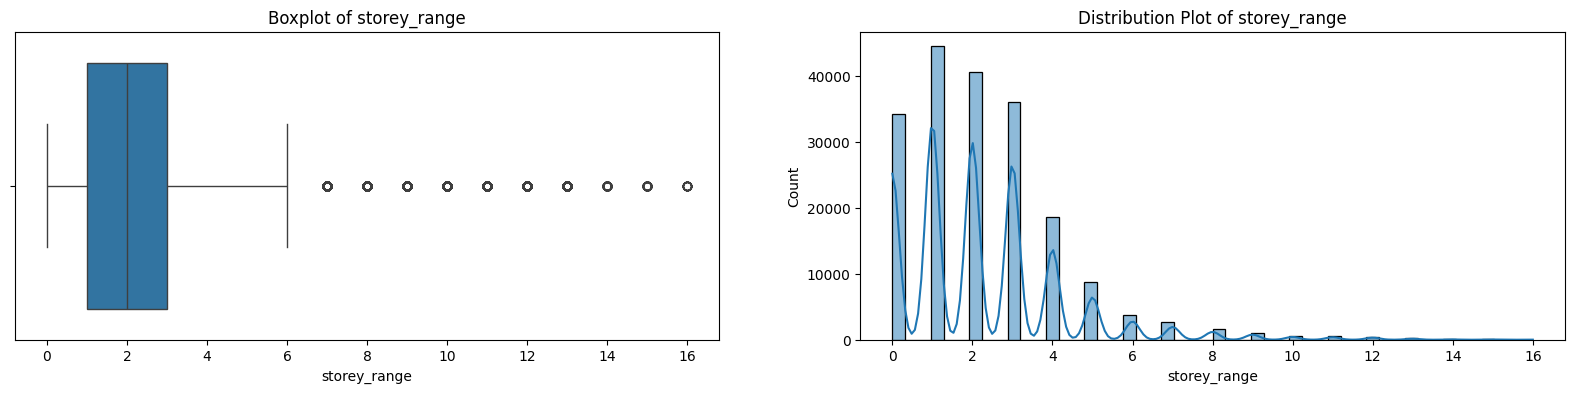

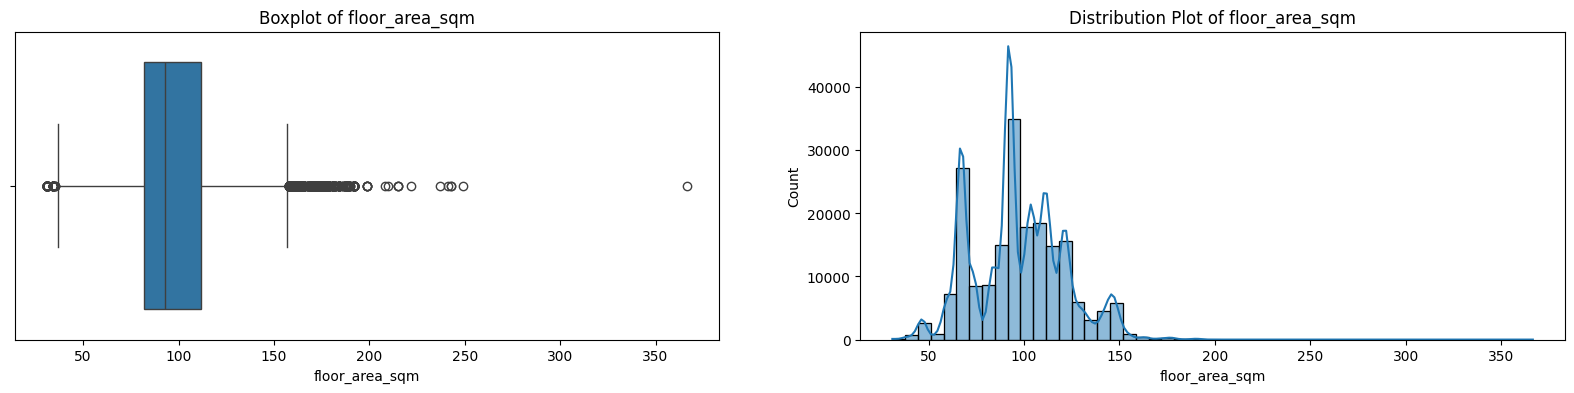

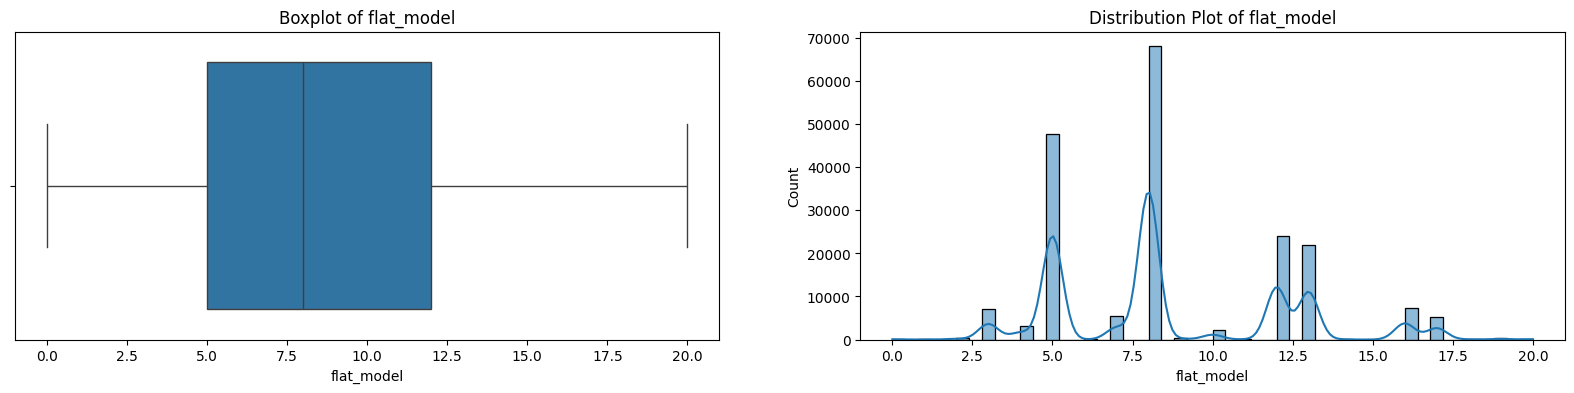

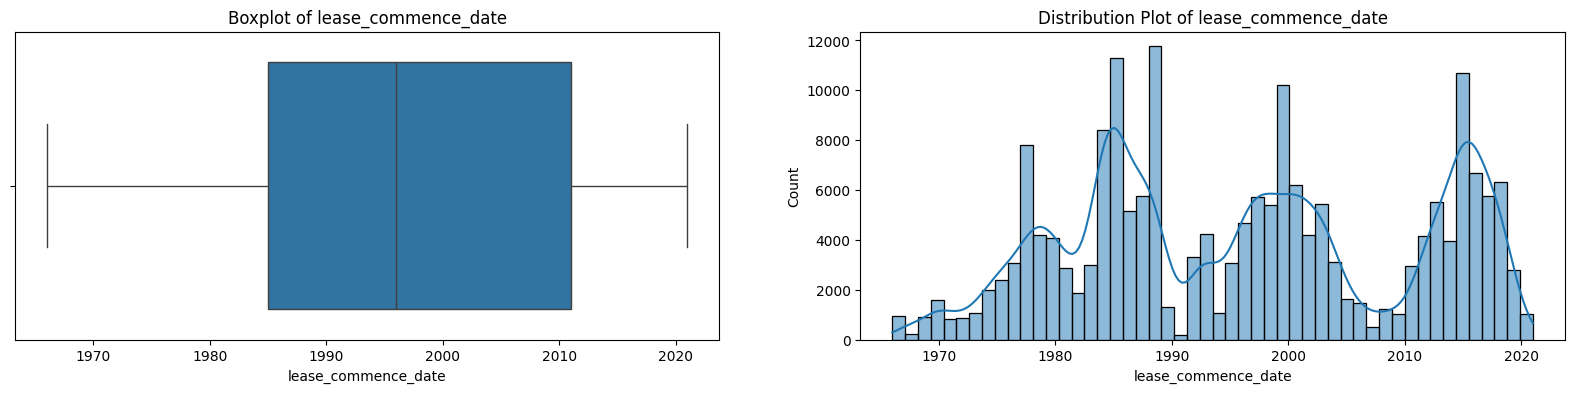

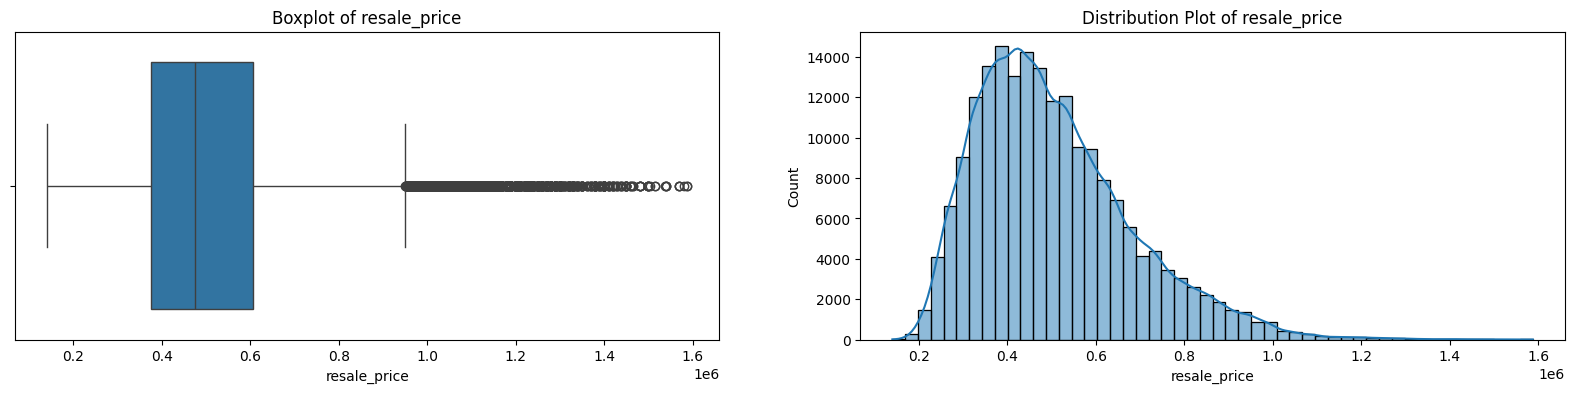

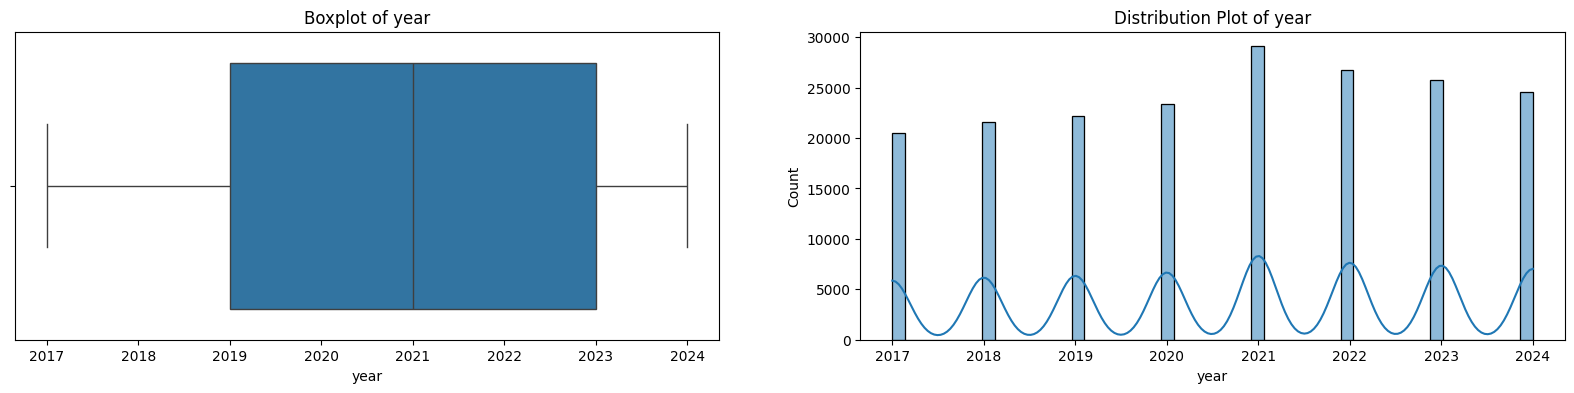

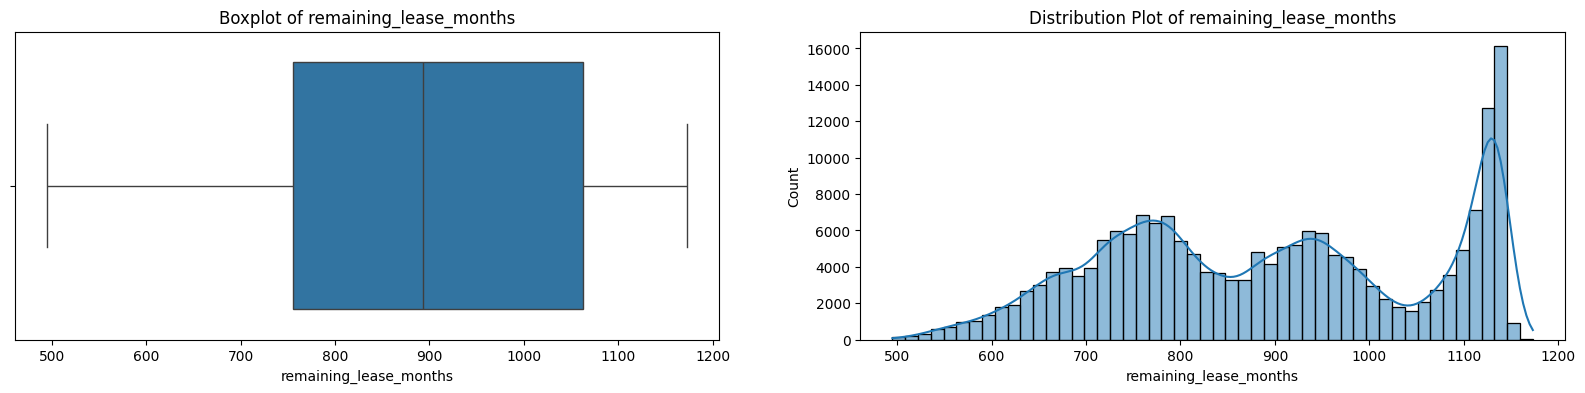

In [28]:
# Before Treatment

def visualize_outliers_skewness(df, columns):
    plt.figure(figsize=(20, 4))       
    # Boxplot
    plt.subplot(1,2,1)
    sns.boxplot(data=df, x=columns)
    plt.title(f'Boxplot of {columns}')
    
    # Distribution Plot
    plt.subplot(1,2,2)
    sns.histplot(data=df, x=columns, kde=True, bins=50)
    plt.title(f'Distribution Plot of {columns}')

    plt.show()

for i in df.columns:
    visualize_outliers_skewness(df, i)

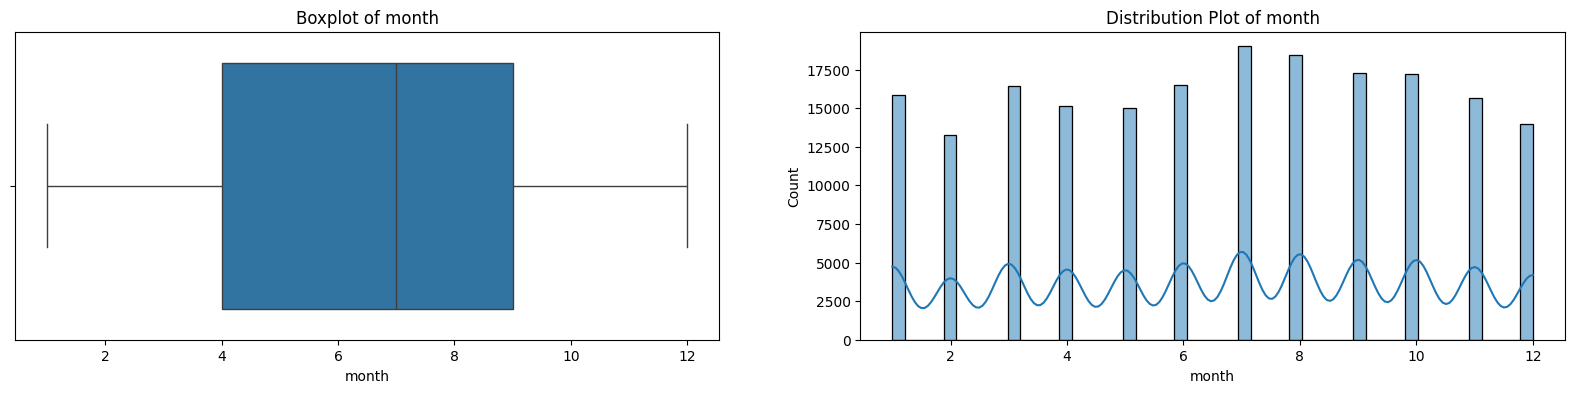

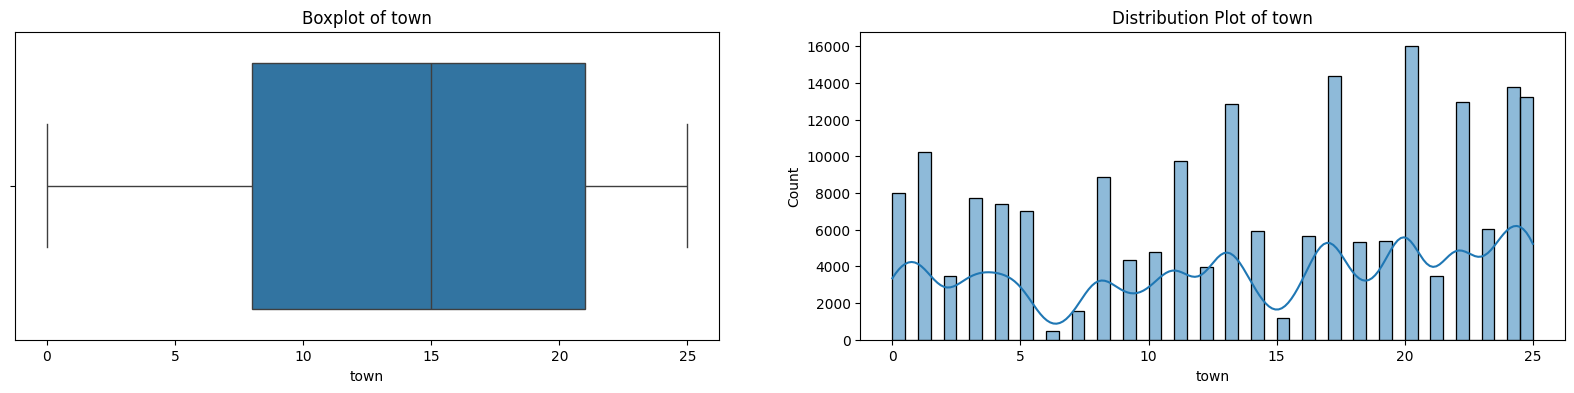

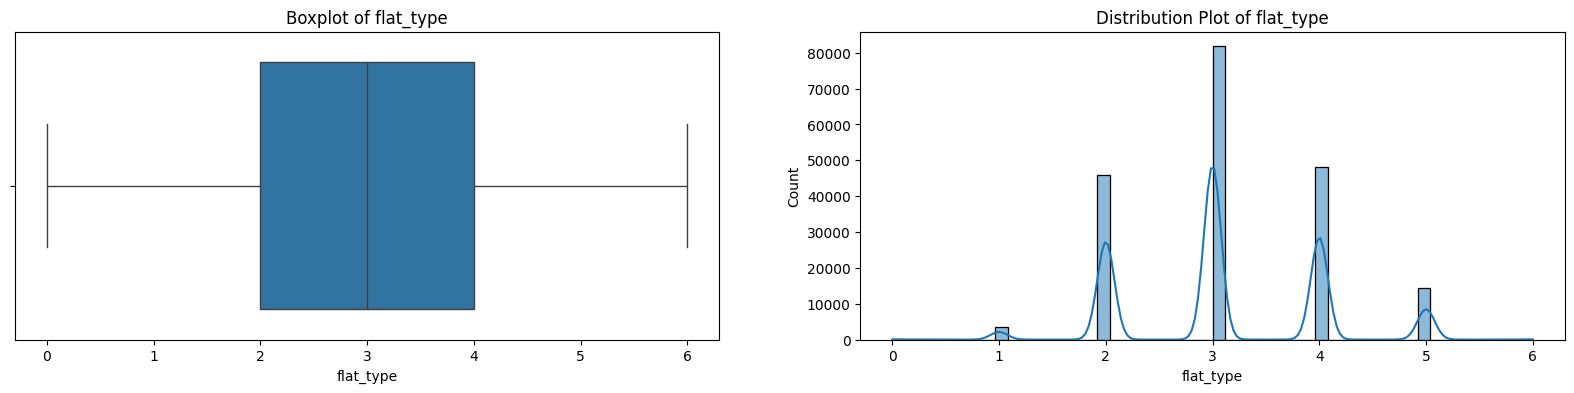

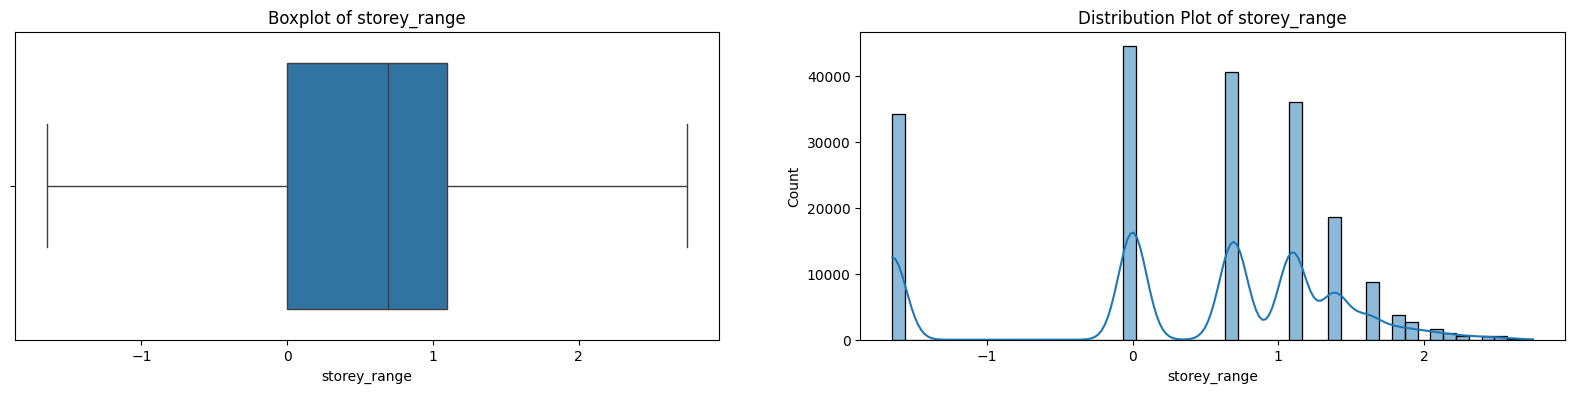

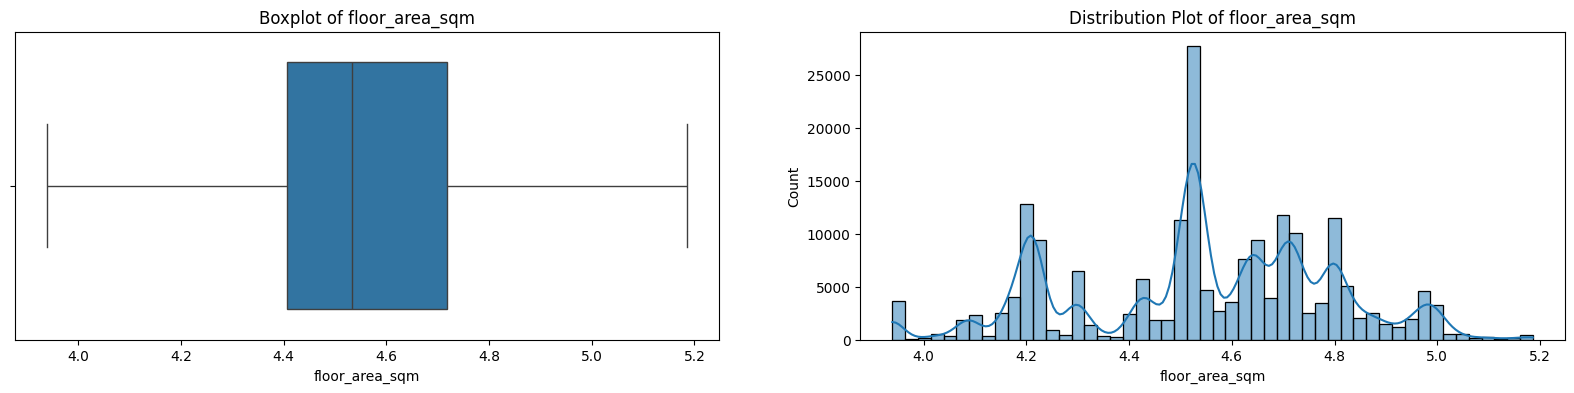

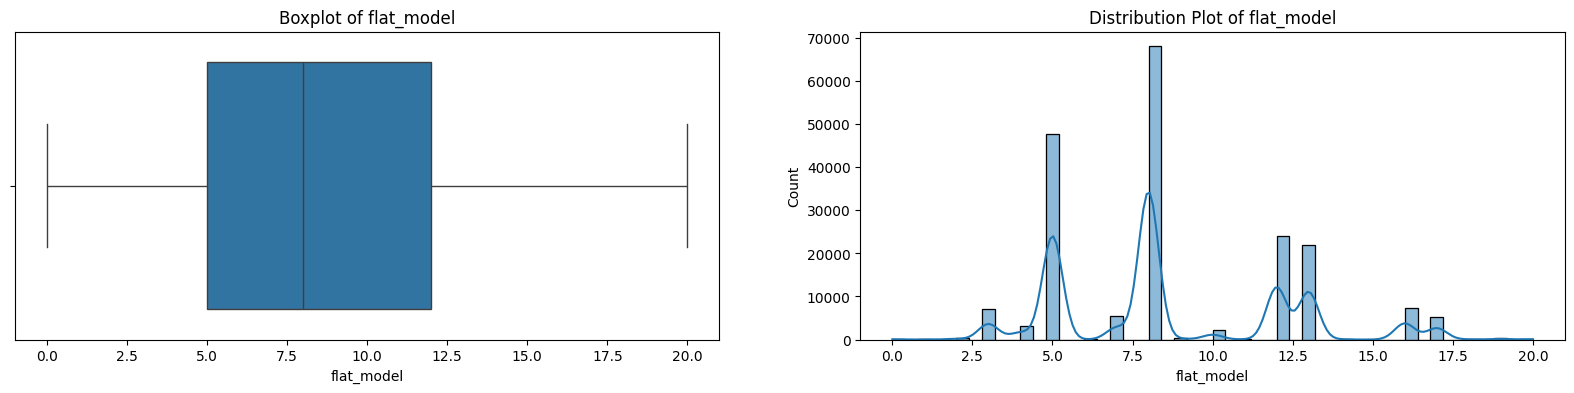

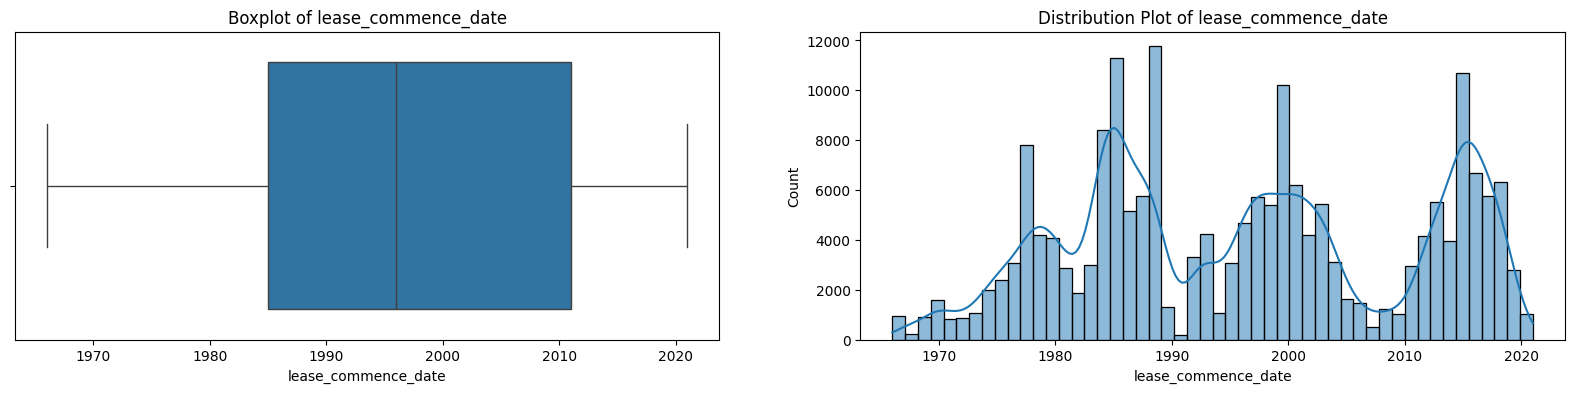

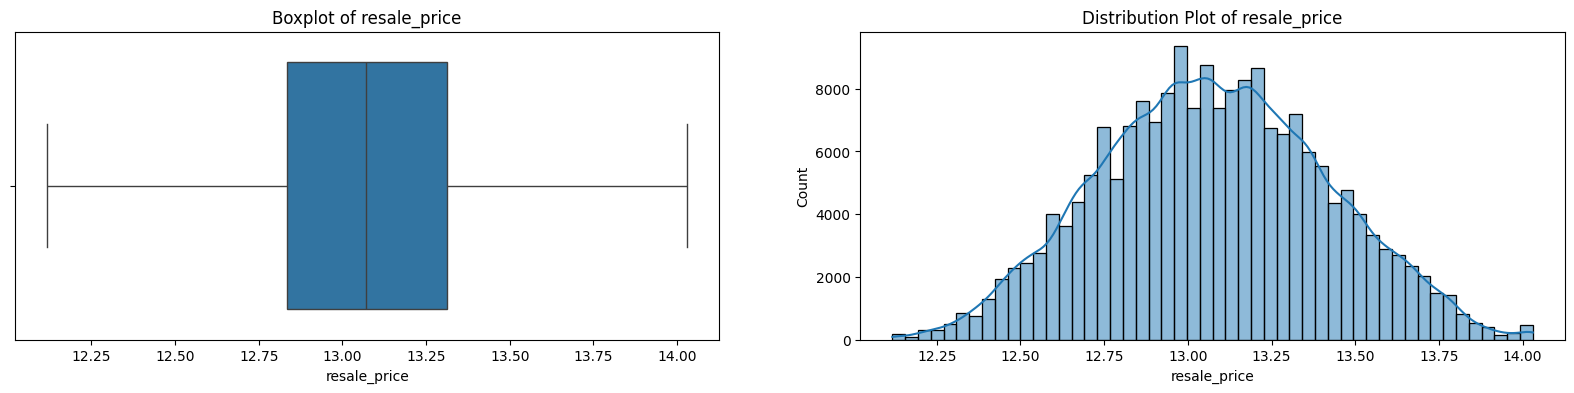

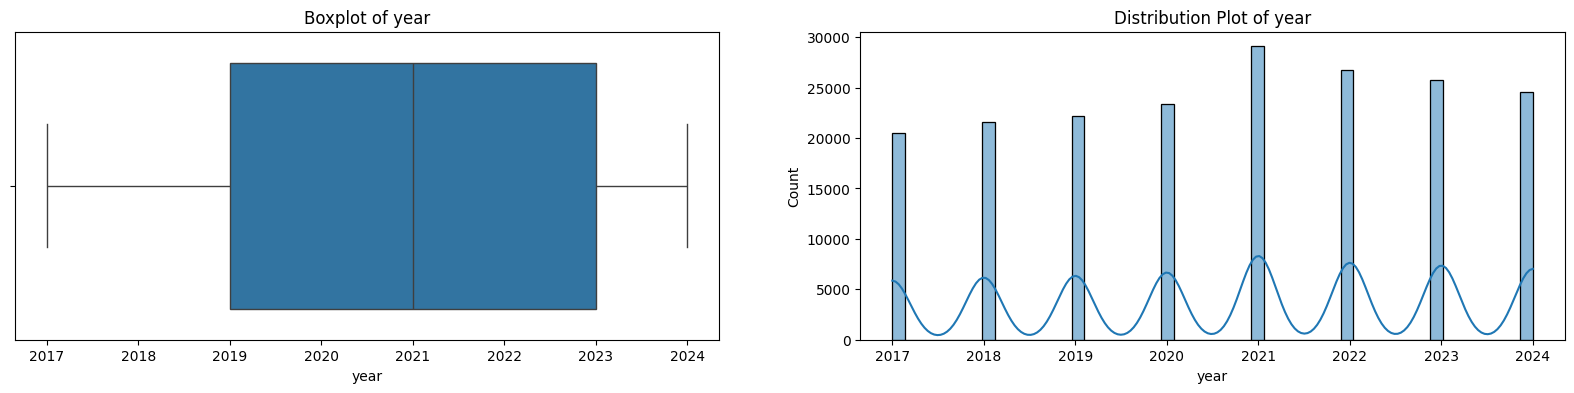

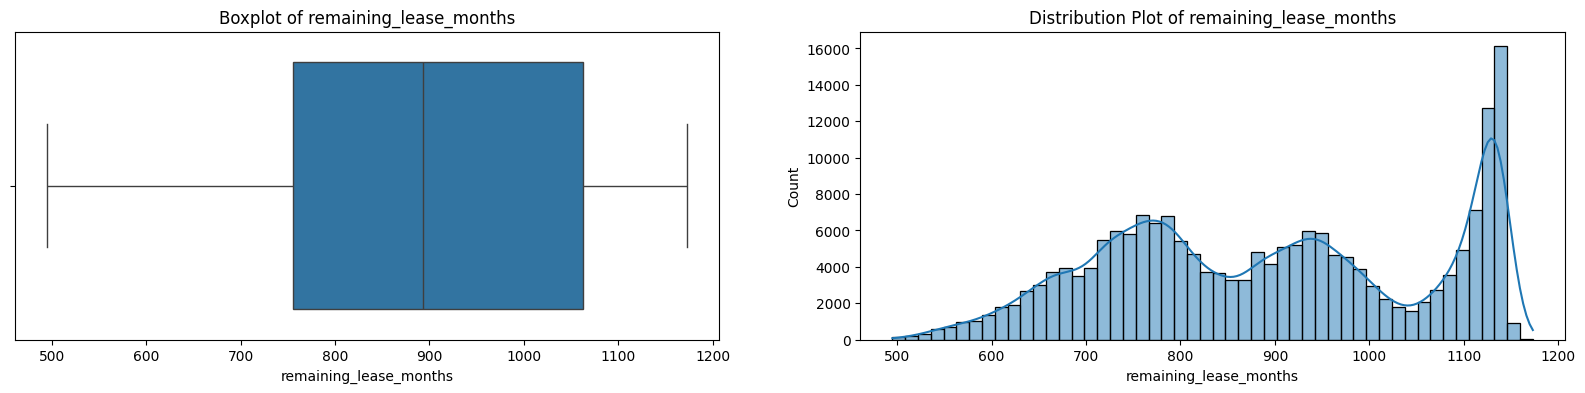

In [29]:
# Skewness Handling
df['storey_range'] = np.log(df['storey_range'])
df['floor_area_sqm'] = np.log(df['floor_area_sqm'])
df['resale_price'] = np.log(df['resale_price'])

# Outliers Detection and Cap the Outliers 
def detect_outliers_iqr(df, columns):
    Q1 = df[columns].quantile(0.25)
    Q3 = df[columns].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    df[columns] = df[columns].clip(lower_bound,upper_bound)

for i in df.columns:
    detect_outliers_iqr(df, i)

# After Treatment
for i in df.columns:
    visualize_outliers_skewness(df, i)

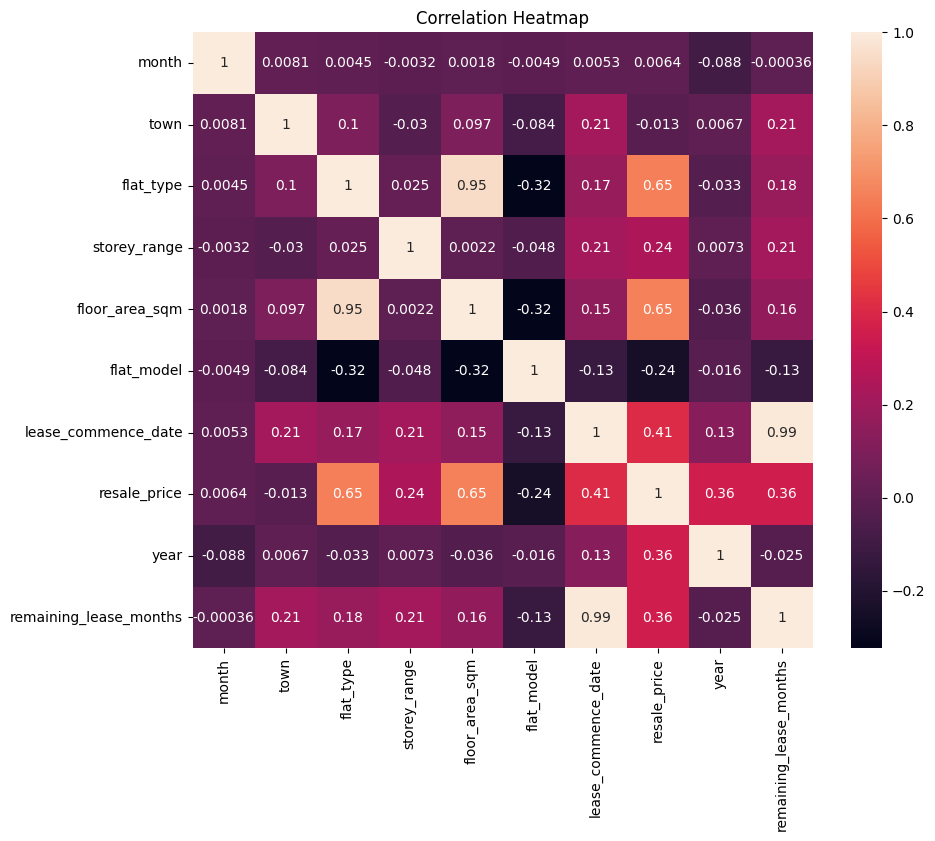

In [30]:
# Check for correlation
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True)
plt.title('Correlation Heatmap')
plt.show()

In [31]:
df_final = df.copy()

X = df_final.drop(["resale_price"],axis=1)
y = df_final['resale_price']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2) 

In [32]:
# Standardize the features of a dataset
scaler = StandardScaler()
x_scaled = scaler.fit_transform(X)
x_scaled = pd.DataFrame(x_scaled, columns=X.columns)

In [33]:
# Find out best models
df_sample = df_final.head(10000)
X_sample = df_sample.drop(["resale_price"],axis=1)
y_sample = df_sample['resale_price']

X_train_sample,X_test_sample,y_train_sample,y_test_sample = train_test_split(X_sample,y_sample,test_size=0.2) 

reg = LazyRegressor(verbose=0, ignore_warnings=False, custom_metric=None)
models, predictions = reg.fit(X_train_sample, X_test_sample, y_train_sample, y_test_sample)

print(models)

 98%|█████████▊| 41/42 [01:32<00:01,  1.43s/it]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001408 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 493
[LightGBM] [Info] Number of data points in the train set: 8000, number of used features: 8
[LightGBM] [Info] Start training from score 12.952463


100%|██████████| 42/42 [01:33<00:00,  2.22s/it]

                               Adjusted R-Squared  R-Squared  RMSE  Time Taken
Model                                                                         
XGBRegressor                                 0.94       0.94  0.08        0.37
HistGradientBoostingRegressor                0.92       0.93  0.08        0.90
LGBMRegressor                                0.92       0.92  0.09        0.28
RandomForestRegressor                        0.92       0.92  0.09        5.96
ExtraTreesRegressor                          0.91       0.91  0.09        4.32
BaggingRegressor                             0.91       0.91  0.09        0.86
DecisionTreeRegressor                        0.86       0.86  0.11        0.11
GradientBoostingRegressor                    0.85       0.85  0.12        1.64
ExtraTreeRegressor                           0.81       0.81  0.14        0.09
NuSVR                                        0.75       0.75  0.15        9.51
SVR                                          0.75   

In [ ]:
'''
XGBRegressor
HistGradientBoostingRegressor
DecisionTreeRegressor
RandomForestRegressor
ExtraTreesRegressor
'''

In [38]:
# Choosing the model
models = [XGBRegressor(),
          HistGradientBoostingRegressor(),
          RandomForestRegressor(),
          ExtraTreesRegressor(),
          DecisionTreeRegressor()]
     
for model in models:   
    model.fit(X_train, y_train) 
    train_pred = model.predict(X_train)  
    test_pred = model.predict(X_test)   

    print(f"********* {model.__class__.__name__} *********")
    print(f"Train MAE: {mean_absolute_error(y_train, train_pred)}")
    print(f"Train MSE: {mean_squared_error(y_train, train_pred)}")
    print(f"Train R²: {r2_score(y_train, train_pred)}")
    
    print(f"Test MAE: {mean_absolute_error(y_test, test_pred)}")
    print(f"Test MSE: {mean_squared_error(y_test, test_pred)}")
    print(f"Test R²: {r2_score(y_test, test_pred)} \n\n")

********* XGBRegressor *********
Train MAE: 0.050812927848190054
Train MSE: 0.004512844863933239
Train R²: 0.9608159222437315
Test MAE: 0.05240549693436966
Test MSE: 0.004814623219033845
Test R²: 0.9584234359957535 


********* HistGradientBoostingRegressor *********
Train MAE: 0.06212903728362901
Train MSE: 0.00662433274860481
Train R²: 0.9424823193947562
Test MAE: 0.06265249642739447
Test MSE: 0.006764048834951628
Test R²: 0.9415892175731564 


********* RandomForestRegressor *********
Train MAE: 0.01956259274065479
Train MSE: 0.0007458957581720602
Train R²: 0.9935235448442136
Test MAE: 0.05064858740039761
Test MSE: 0.004884746134993104
Test R²: 0.9578178912270542 


********* ExtraTreesRegressor *********
Train MAE: 0.0020103485468510656
Train MSE: 9.314095969230523e-05
Train R²: 0.999191276740744
Test MAE: 0.054319420473774964
Test MSE: 0.005618163081681771
Test R²: 0.9514844866721035 


********* DecisionTreeRegressor *********
Train MAE: 0.0020103485468377646
Train MSE: 9.3140959

In [40]:
# RandomForestRegressor -  Easier Interpretability

# Finding best parameters
model = RandomForestRegressor()
params = {
    'n_estimators':[100, 150, 200],
    'max_features':['sqrt', 'log2', None],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5]
}
cv = GridSearchCV(model,params, n_jobs=-1, cv=5)
cv.fit(X_train_sample,y_train_sample)

GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20],
                         'max_features': ['sqrt', 'log2', None],
                         'min_samples_leaf': [1, 2, 5],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 150, 200]})

In [41]:
cv.best_params_

{'max_depth': 20,
 'max_features': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 200}

In [42]:
cv.best_score_

np.float64(0.9127989307950006)

In [43]:
# Adding Parameters
X = df_final.drop(["resale_price"],axis=1)
y = df_final['resale_price']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2) 

model = RandomForestRegressor(max_depth=20, max_features=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200)  
model.fit(X_train, y_train)
train_pred = model.predict(X_train)  
test_pred = model.predict(X_test)   

print(f"Train MAE: {mean_absolute_error(y_train, train_pred)}")
print(f"Train MSE: {mean_squared_error(y_train, train_pred)}")
print(f"Train R²: {r2_score(y_train, train_pred)}")

print(f"Test MAE: {mean_absolute_error(y_test, test_pred)}")
print(f"Test MSE: {mean_squared_error(y_test, test_pred)}")
print(f"Test R²: {r2_score(y_test, test_pred)} \n\n")

Train MAE: 0.03261921708892117
Train MSE: 0.0021305504481170276
Train R²: 0.9814809115419981
Test MAE: 0.05250201216225796
Test MSE: 0.005220075371236763
Test R²: 0.9551062570770703 




In [ ]:
''' 
Log Values:
storey_range
floor_area_sqm
resale_price
'''

In [44]:
X.columns

Index(['month', 'town', 'flat_type', 'storey_range', 'floor_area_sqm',
       'flat_model', 'lease_commence_date', 'year', 'remaining_lease_months'],
      dtype='object')

In [45]:
df_final.head(2)

,month,town,flat_type,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,year,remaining_lease_months
0,1,0,1,1.10,3.94,5,1979,12.35,2017,736
1,1,0,2,-1.65,4.20,12,1978,12.43,2017,727


In [49]:
# Make the prediction
user_data = np.array([[1,0,1,1.10,3.94,5,1979,2017,736]])
y_pred = model.predict(user_data)
print("Predicted resale price with Log: ",y_pred[0])
print("Predicted resale price without Log: ",np.exp(y_pred[0]))

Predicted resale price with Log:  12.385391215116849
Predicted resale price without Log:  239280.36413969635


In [48]:
# Saving the model
with open("model.pkl","wb") as ft:
    pickle.dump(model,ft) 
with open("model.pkl","rb") as ft:
    ml = pickle.load(ft)

In [50]:
user_data = {
    'month': [1],
    'town': [0],
    'flat_type': [1],
    'storey_range': [1.10],
    'floor_area_sqm': [3.94],
    'flat_model': [5],
    'lease_commence_date': [1979],
    'year': [2017],
    'remaining_lease_months': [736]
}
user_df = pd.DataFrame(user_data)

# Make the prediction
y_pred = model.predict(user_df)
print("Predicted resale price with Log: ", y_pred[0])
print("Predicted resale price without Log: ", np.exp(y_pred[0]))

Predicted resale price with Log:  12.385391215116849
Predicted resale price without Log:  239280.36413969635
